In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# 1. Basic Summary Statistics

In [2]:
data = pd.read_csv("assignment_data.csv")

In [24]:
data.head(5)

,Student ID,Session ID,Date,EEG Data (PSD Features),Engagement Level,Attention Level,Internet Connectivity,Adaptivity Level,Learning Mode Prediction,Performance Metrics,Engagement_Score,Attention_Score
0,1,183,2025-01-20,"[0.02336871035675725, 0.14892576656473, 0.4845...",High,High,High (Mobile/Wi-Fi),Moderate,Visual Learner,84,3,3
1,2,121,2025-01-20,"[0.3587673311624021, 0.8537981137219391, 0.420...",Low,High,Moderate (Wi-Fi),High,Auditory Learner,82,1,3
2,3,169,2025-01-10,"[0.7420744093003028, 0.9072353407615483, 0.122...",Moderate,High,Low (Mobile),Low,Auditory Learner,83,2,3
3,4,132,2025-01-20,"[0.5596059164442914, 0.4645215049524961, 0.062...",High,Moderate,Low (Mobile),Moderate,Visual Learner,66,3,2
4,5,190,2025-01-18,"[0.15041646487754368, 0.7331633184349893, 0.86...",High,High,High (Mobile/Wi-Fi),Moderate,Auditory Learner,93,3,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Student ID                10000 non-null  int64 
 1   Session ID                10000 non-null  int64 
 2   Date                      10000 non-null  object
 3   EEG Data (PSD Features)   10000 non-null  object
 4   Engagement Level          10000 non-null  object
 5   Attention Level           10000 non-null  object
 6   Internet Connectivity     10000 non-null  object
 7   Adaptivity Level          10000 non-null  object
 8   Learning Mode Prediction  10000 non-null  object
 9   Performance Metrics       10000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 781.4+ KB


In [5]:
data.describe()

,Student ID,Session ID,Performance Metrics
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,149.762700,74.674300
std,2886.89568,28.783232,14.383404
min,1.00000,100.000000,50.000000
25%,2500.75000,125.000000,62.000000
50%,5000.50000,150.000000,75.000000
75%,7500.25000,174.000000,87.000000
max,10000.00000,199.000000,99.000000


In [6]:
data.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Student ID                10000 non-null  bool 
 1   Session ID                10000 non-null  bool 
 2   Date                      10000 non-null  bool 
 3   EEG Data (PSD Features)   10000 non-null  bool 
 4   Engagement Level          10000 non-null  bool 
 5   Attention Level           10000 non-null  bool 
 6   Internet Connectivity     10000 non-null  bool 
 7   Adaptivity Level          10000 non-null  bool 
 8   Learning Mode Prediction  10000 non-null  bool 
 9   Performance Metrics       10000 non-null  bool 
dtypes: bool(10)
memory usage: 97.8 KB


In [7]:
data["Learning Mode Prediction"].value_counts()

Learning Mode Prediction
Kinesthetic Learner    3374
Auditory Learner       3326
Visual Learner         3300
Name: count, dtype: int64

# 2. Daily Average Engagement and Attention

In [8]:
data["Date"] = pd.to_datetime(data["Date"])

In [9]:
engagement = {"Low" : 1, "Moderate" : 2, "High" : 3}
attention = {"Low" : 1, "Moderate" : 2, "High" : 3}

In [10]:
data['Engagement_Score'] = data['Engagement Level'].map(engagement)
data['Attention_Score'] = data['Attention Level'].map(attention)

In [22]:
daily_score = data.groupby("Date")[["Engagement_Score", "Attention_Score"]].mean()

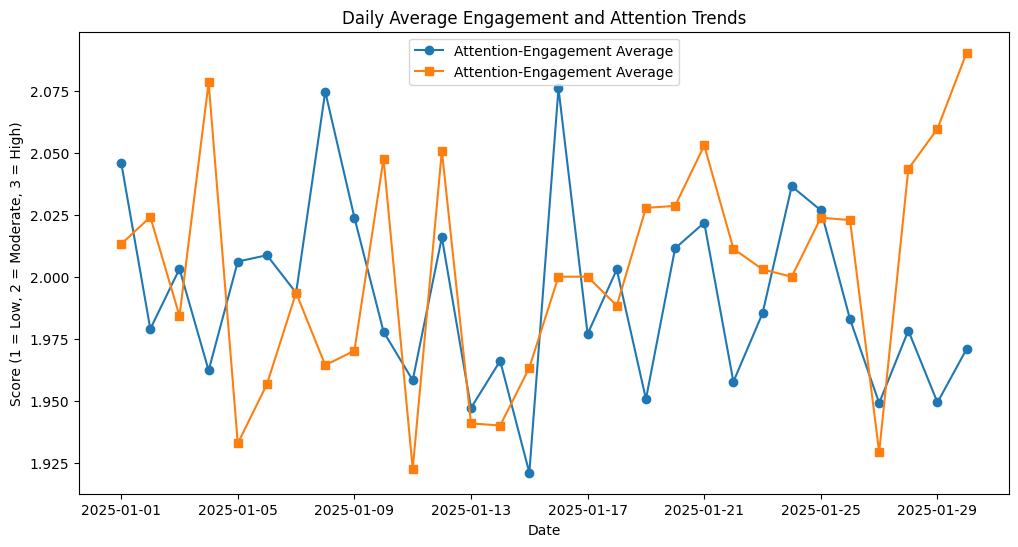

In [23]:
plt.figure(figsize=(12,6))
plt.plot(daily_score.index, daily_score["Engagement_Score"], label="Attention-Engagement Average", marker="o")
plt.plot(daily_score.index, daily_score["Attention_Score"], label="Attention-Engagement Average", marker="s")
plt.title('Daily Average Engagement and Attention Trends')
plt.xlabel('Date')
plt.ylabel('Score (1 = Low, 2 = Moderate, 3 = High)')
plt.legend()
plt.show()

# 3. Most and Least Engaged Students

In [13]:
student_scores = data.groupby('Student ID')[['Engagement_Score', 'Attention_Score']].mean()

In [14]:
student_scores['Combined_Score'] = student_scores.mean(axis=1)

In [15]:
top_10 = student_scores.sort_values(by='Combined_Score', ascending=False).head(10)


In [16]:
bottom_10 = student_scores.sort_values(by='Combined_Score').head(10)

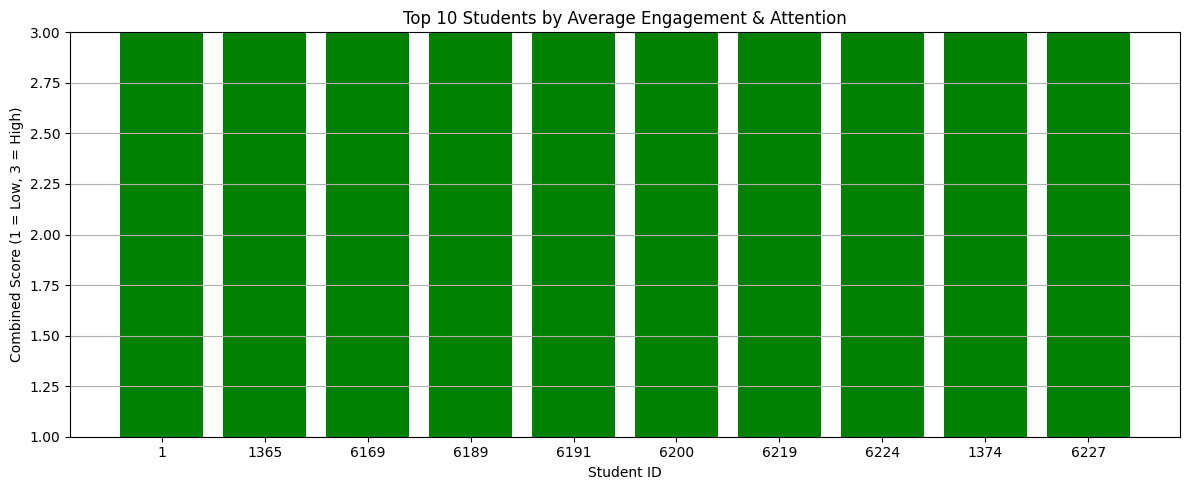

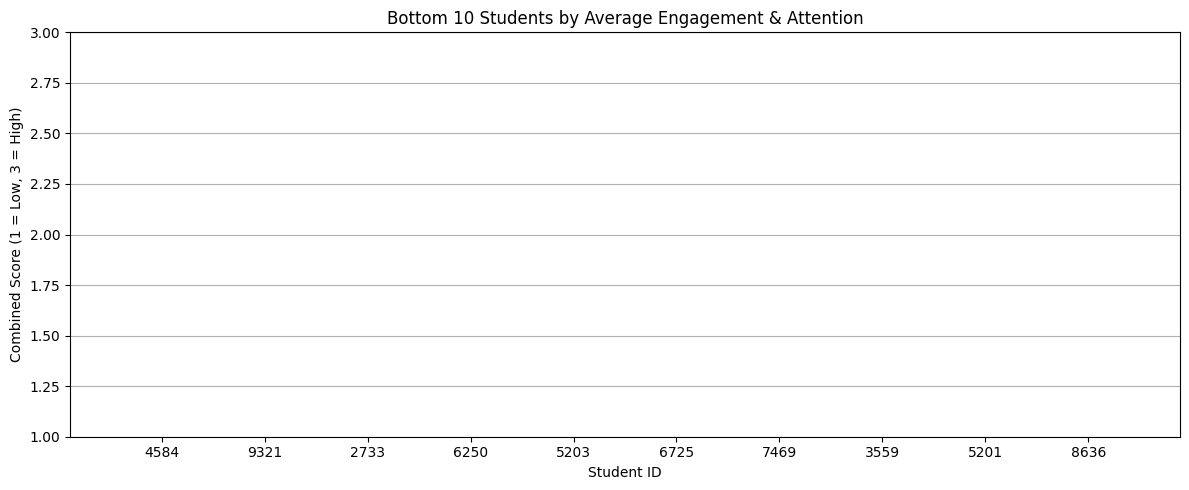

In [17]:
# Plot Top 10
plt.figure(figsize=(12, 5))
plt.bar(top_10.index.astype(str), top_10['Combined_Score'], color='green')
plt.title('Top 10 Students by Average Engagement & Attention')
plt.xlabel('Student ID')
plt.ylabel('Combined Score (1 = Low, 3 = High)')
plt.ylim(1, 3)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Bottom 10
plt.figure(figsize=(12, 5))
plt.bar(bottom_10.index.astype(str), bottom_10['Combined_Score'], color='red')
plt.title('Bottom 10 Students by Average Engagement & Attention')
plt.xlabel('Student ID')
plt.ylabel('Combined Score (1 = Low, 3 = High)')
plt.ylim(1, 3)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 4. Engagement by Learning Mode

In [18]:
engagement_by_mode = data.groupby('Learning Mode Prediction')['Engagement_Score'].mean().sort_values(ascending=False)

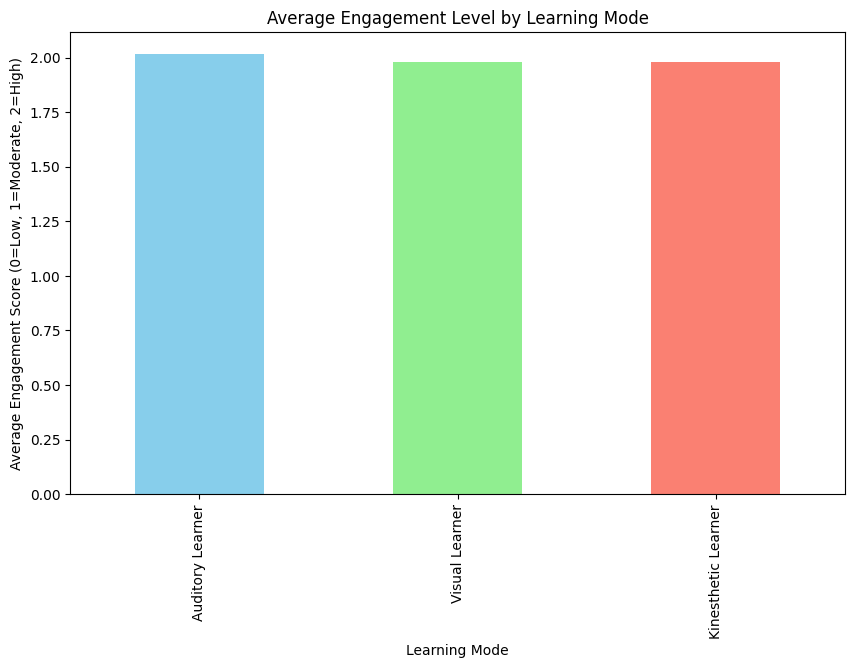

In [26]:
plt.figure(figsize=(10, 6))
engagement_by_mode.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Engagement Level by Learning Mode')
plt.ylabel('Average Engagement Score (0=Low, 1=Moderate, 2=High)')
plt.xlabel('Learning Mode')
plt.show()